# 문제 정의와 데이터 수집

> 원래는 넷플릭스 영화 추천 알고리즘을 해보려고 하였으나, Kaggle을 뒤져보는 중 재미있는 dataset을 발견하여 애니메이션 추천 알고리즘을 만들어보기로 하였다. 또한 나중에 만들어 보고 싶은 AnimeGAN에 대한 선행학습이라 생각하고 진행해보기로 하였다.
#### dataset : https://www.kaggle.com/CooperUnion/anime-recommendations-database

### Cloumns Description (Anime.csv)
| Column | Description |
|:---:|:---:|
|Anime_id|애니메이션을 식별하는 myanimelist.net의 고유 ID입니다.|
|name|애니메이션의 전체 이름.|
|genre|이 애니메이션의 쉼표로 구분된 장르 목록입니다.|
|type|영화, TV, OVA 등|
|episodes|이 쇼의 에피소드 수입니다. (영화인 경우 1).|
|rating|이 애니메이션에 대한 10점 만점의 평균 등급입니다.|
|members|이 애니메이션의
"그룹" 에 있는 커뮤니티 회원 수입니다 .|

### Cloumns Description (Rating.csv)
| Column | Description |
|:---:|:---:|
|user_id|식별할 수 없는 무작위로 생성된 사용자 ID입니다.|
|anime_id|이 사용자가 평가한 애니메이션.|
|rating|이 사용자가 할당한 10점 만점의 등급입니다(사용자가 시청했지만 등급을 할당하지 않은 경우 -1).|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_anime = pd.read_csv("data/Anime.csv")
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df_rating = pd.read_csv("data/Rating.csv")
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [6]:
df_anime["type"].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [7]:
df_anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

# 결측값 처리하기
- 위에서 확인한 결과 genre, type, rating에 각각 62, 25, 230개의 결측값이 있다는 것을 알 수 있다.
- 결측값이 있는 row가 적다고 생각하여 삭제하기로 결정했다.
- 하지만 rating은 중간값으로 채워주기로 하였다.

In [8]:
df_anime.dropna(subset=["genre", "type"], inplace=True)
df_anime.isna().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      193
members       0
dtype: int64

In [9]:
# 중간값확인
df_anime["rating"].describe()

count    12017.000000
mean         6.478264
std          1.023857
min          1.670000
25%          5.890000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [10]:
# rating의 결측값 중간값으로 바꾸기
df_anime["rating"].fillna(6.57, inplace=True)
df_anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
# 마찬가지로 Rating.csv의 결측값 확인
df_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [12]:
import matplotlib.font_manager as fm
font_path = r'D:/font/NanumBarunpenB.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

Text(0.5, 0, 'Anime_members')

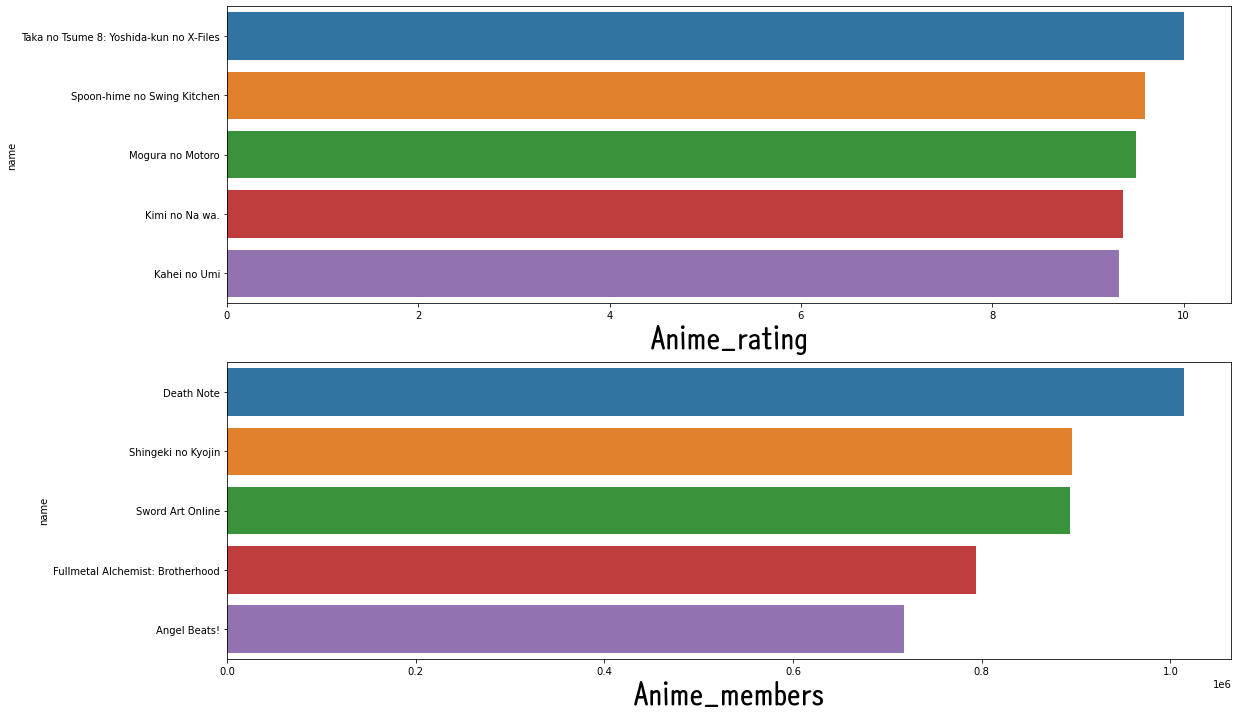

In [14]:
# Anime_rating, Anime_members로 보는 Anime 인기순위
figure, (ax1,ax2) = plt.subplots(nrows = 2, ncols =1 ) 
figure.set_size_inches(18,12) 
sns.barplot(data=df_anime.sort_values("rating", ascending=False)[:5], x="rating", y="name", ax=ax1) 
sns.barplot(data=df_anime.sort_values("members", ascending=False)[:5], x="members", y="name", ax=ax2) 
ax1.set_xlabel("Anime_rating", fontsize=30, fontproperties=fontprop) 
ax2.set_xlabel("Anime_members", fontsize=30, fontproperties=fontprop)